In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
file = 'avm.wav'
sig , sr = librosa.load(file,mono=True,sr=None)

In [5]:
sig

array([ 1.5258789e-04,  6.7138672e-04,  4.5776367e-04, ...,
       -5.7983398e-04, -2.4414062e-04,  9.1552734e-05], dtype=float32)

In [9]:
avm = 'avm.wav'

avm_Sig , sr2 = librosa.load(avm,mono=True,sr=None)

time_avm=np.arange(0,avm_Sig.shape[0])/sr2

In [11]:
avm_Spec = librosa.amplitude_to_db(np.abs(librosa.stft(avm_Sig)), ref=np.max)

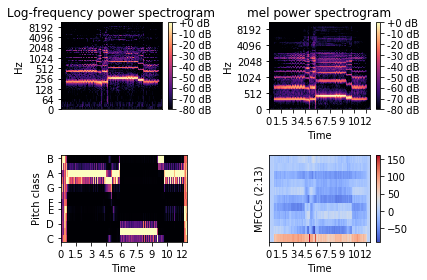

In [38]:
sig_harmonic, sig_percussive = librosa.effects.hpss(sig)

S_harmonic   = librosa.feature.melspectrogram(sig_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(sig_percussive, sr=sr)

plt.figure()
plt.subplot(2,2,1)

librosa.display.specshow(avm_Spec, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

plt.subplot(2,2,2)

S = librosa.feature.melspectrogram(y=sig, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

plt.subplot(2,2,3)

stftChroma = librosa.feature.chroma_stft(y=sig_harmonic,sr=sr, n_chroma=12)
librosa.display.specshow(stftChroma, y_axis='chroma', sr=sr,vmin=0.0, vmax=1.0, x_axis='time')

plt.subplot(2,2,4)

hop_length = 1024

mfcc = librosa.feature.mfcc(y=sig, sr=sr, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(mfcc[1:12,:],x_axis='time')
plt.ylabel('MFCCs (2:13)')
plt.colorbar()


plt.tight_layout()